In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'inayat514'
os.environ['KAGGLE_KEY'] = '24d0b431765bf0986b5066783f1e1aba'

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.10G/2.13G [00:22<00:00, 88.1MB/s]
100% 2.13G/2.13G [00:22<00:00, 103MB/s] 


In [ ]:
!unzip -q leapgestrecog.zip


In [ ]:
data_dir = "/content/leapgestrecog/leapGestRecog"


In [ ]:
file_paths = []
labels = []

In [ ]:
for subject_folder in os.listdir(data_dir):
    subject_dir = os.path.join(data_dir, subject_folder)

    for gesture_folder in os.listdir(subject_dir):
        gesture_dir = os.path.join(subject_dir, gesture_folder)

        for image_file in os.listdir(gesture_dir):
            image_path = os.path.join(gesture_dir, image_file)
            file_paths.append(image_path)
            labels.append(gesture_folder)

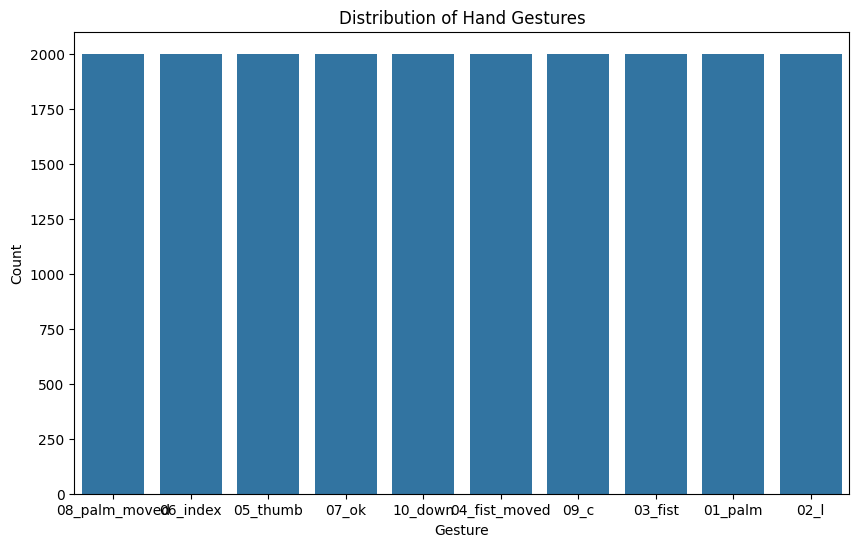

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=labels)
plt.title("Distribution of Hand Gestures")
plt.xlabel("Gesture")
plt.ylabel("Count")
plt.show()


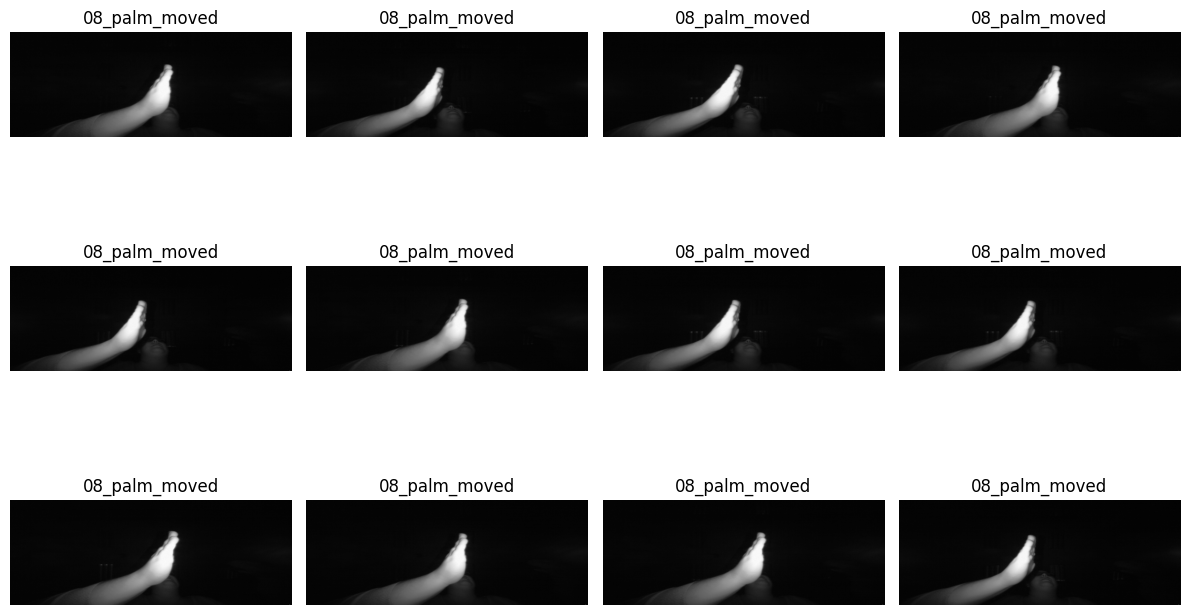

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(file_paths[i])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def load_and_preprocess_image(file_path, img_size):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    return img

In [ ]:
for subject_folder in os.listdir(data_dir):
    subject_dir = os.path.join(data_dir, subject_folder)

    for gesture_folder in os.listdir(subject_dir):
        gesture_dir = os.path.join(subject_dir, gesture_folder)

        for image_file in os.listdir(gesture_dir):
            image_path = os.path.join(gesture_dir, image_file)
            file_paths.append(image_path)
            labels.append(gesture_folder)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(file_paths, y, test_size=0.2, random_state=42)


In [ ]:
img_size = (128, 128)
batch_size = 32

In [ ]:
def batch_generator(file_paths, labels, batch_size, img_size):
    num_samples = len(file_paths)
    num_batches = num_samples // batch_size
    while True:
        for i in range(num_batches):
            batch_file_paths = file_paths[i*batch_size: (i+1)*batch_size]
            batch_labels = labels[i*batch_size: (i+1)*batch_size]
            X_batch = np.array([load_and_preprocess_image(file_path, img_size) for file_path in batch_file_paths])
            yield X_batch, batch_labels

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # Assuming there are 10 hand gestures
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    batch_generator(X_train, y_train, batch_size, img_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=20,
    validation_data=batch_generator(X_test, y_test, batch_size, img_size),
    validation_steps=len(X_test) // batch_size
)

Epoch 1/20
1000/1000 [==============================] - 125s 117ms/step - loss: 0.1162 - accuracy: 0.9602 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 2/20
1000/1000 [==============================] - 114s 114ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 3/20
1000/1000 [==============================] - 133s 133ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 5.0394e-06 - val_accuracy: 1.0000
Epoch 4/20
1000/1000 [==============================] - 114s 114ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 2.2442e-05 - val_accuracy: 1.0000
Epoch 5/20
1000/1000 [==============================] - 113s 113ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 2.2286e-05 - val_accuracy: 1.0000
Epoch 6/20
1000/1000 [==============================] - 112s 112ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 7/20
1000/1000 [==============================] - 110s 110ms/step - loss: 0.0053 - accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(batch_generator(X_test, y_test, batch_size, img_size),
                                     steps=len(X_test) // batch_size)
print("\nTest Accuracy:", test_acc)

250/250 [==============================] - 30s 121ms/step - loss: 3.6635e-04 - accuracy: 0.9998

Test Accuracy: 0.999750018119812


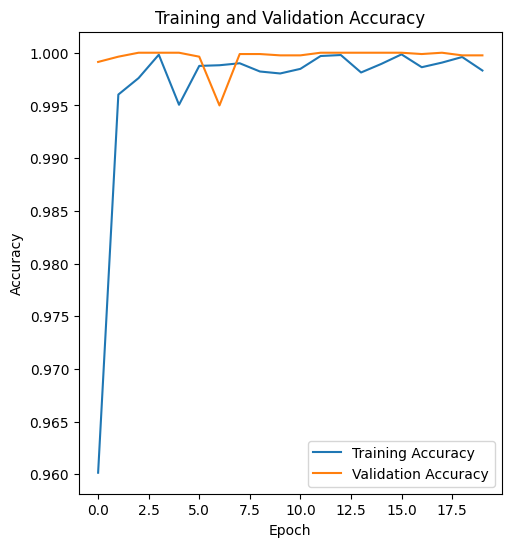

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

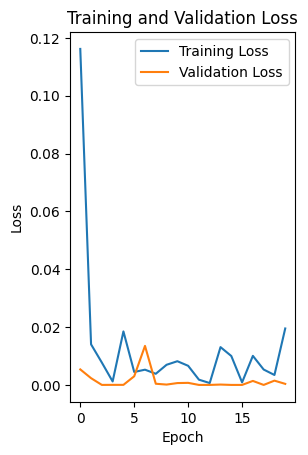

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 73ms/step


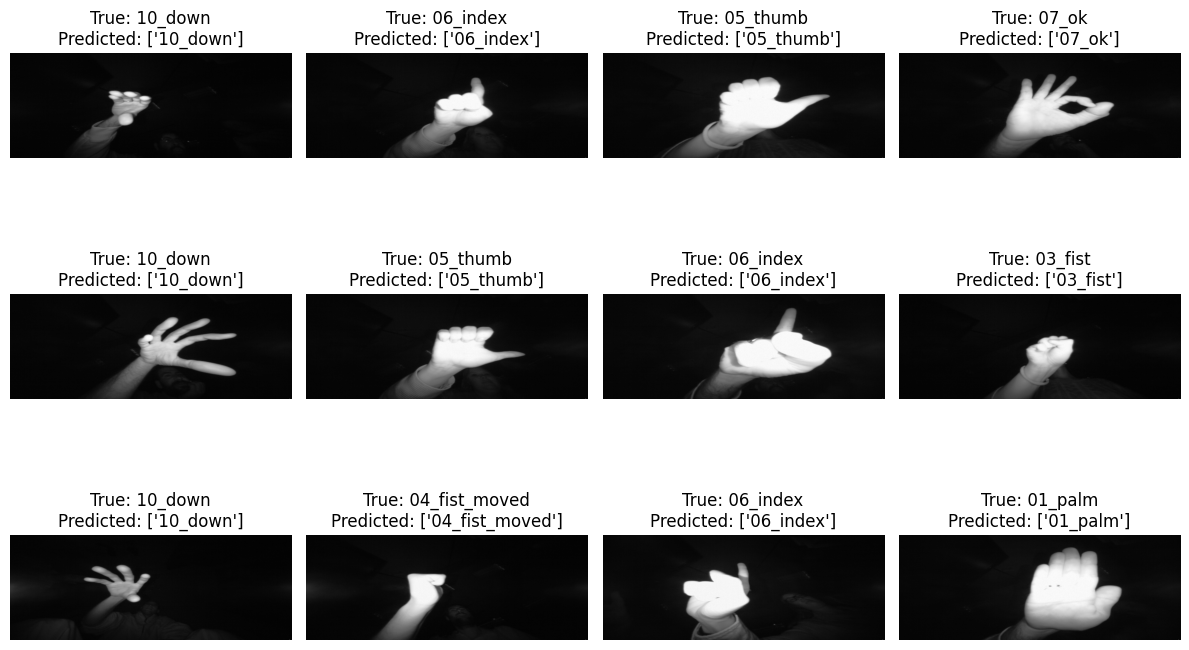

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(X_test[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("True: {}\nPredicted: {}".format(label_encoder.inverse_transform([np.argmax(y_test[i])])[0],
                                                label_encoder.inverse_transform([np.argmax(model.predict(np.expand_dims(load_and_preprocess_image(X_test[i], img_size), axis=0)))])))
    plt.axis('off')
plt.tight_layout()
plt.show()